In [1]:
import torch
from repop import dataset,params2theta,theta2params
import pandas as pd
from matplotlib import pyplot as plt
from synth_data import cases

import numpy as np

In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True,cutoff=300):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

def rel_error(data,case):
    mus,sigs,rhos = data.ev
    rel_error = torch.abs(mus.cpu().reshape(-1,1)/case.mus-1)
    return torch.sum(rel_error.min(axis=1)[0]*rhos.cpu())

In [3]:
case = cases.case2
datapoints = 1000

case = cases.case3
datapoints = 500

In [4]:
filename = 'synth_data/synth_'+ case.name+ '.csv'
th_gt = params2theta(torch.tensor(case.mus),
                     torch.tensor(case.sigs),
                     torch.tensor(case.rhos))

In [5]:
data = load_dataset(filename,Nmax=datapoints,cutoff=case.cutoff)

In [6]:
data.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()


tensor(-2831.5858, device='cuda:0', dtype=torch.float64)

In [7]:
data.evaluate()

22
7.056615059426463 -2824.1264802528362 -701.041257190182
6.762586030584087 -2827.8525049120854 -552.4883468301967
6.522130983420362 -2824.2394099165977 -435.83451331375244
6.371210139965024 -2826.242879671372 -358.66967730284216
6.2241248882477676 -2826.568502868569 -284.94160285037134
6.137058445134734 -2825.888476755973 -242.34830834414112
6.092471684971849 -2825.667817627449 -220.39445567087807
6.063498526274181 -2825.5528477846915 -206.07625647703742
6.043131271723379 -2825.467080580588 -196.0132856938041
6.028741466468732 -2825.415740446751 -188.89561050132406
6.018861232973964 -2825.436698864958 -183.9535894772733
6.012206990116811 -2825.46933521078 -180.60717064532898
6.007598873033391 -2825.4408473158583 -178.3379750660918
6.003843050775792 -2825.198446959554 -176.7083341915169
6.001155551758272 -2824.761799496189 -175.80847363302152
5.9993664426484665 -2824.752638106155 -174.92655659806954
5.997468675693493 -2824.6397832003804 -174.09073015382825


(tensor([ 6731.8077,  5574.0362, 59856.4821, 60015.0498, 59991.8526, 62369.2597,
         59447.2873,  4708.3626, 29469.1027, 58327.5853, 29478.3024, 55974.9050,
         29591.4827, 29665.3641, 29952.0199, 51013.6254, 48853.7777, 33009.2819,
         36247.6816, 32097.6540,   110.9304], device='cuda:0',
        dtype=torch.float64),
 tensor([  913.1806,   661.3894,  4710.2228,  5576.3540,  6356.6308, 13303.5098,
          7936.3960,  1218.2998,  2476.7546,  9923.2564,  2786.4800, 11947.1715,
          3418.5967,  3692.9684,  4203.7524, 12942.1709, 12849.3745,  7193.7570,
          9469.3611,  7786.1403,    27.8658], device='cuda:0',
        dtype=torch.float64),
 tensor([0.1739, 0.1541, 0.0907, 0.0796, 0.0701, 0.0582, 0.0542, 0.0506, 0.0463,
         0.0416, 0.0355, 0.0282, 0.0232, 0.0200, 0.0170, 0.0157, 0.0134, 0.0101,
         0.0086, 0.0070, 0.0021], device='cuda:0', dtype=torch.float64))

/home/pessoa/Codes/CElegans-Plate/repop.py:324: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks() * bins[-1]).astype(int))


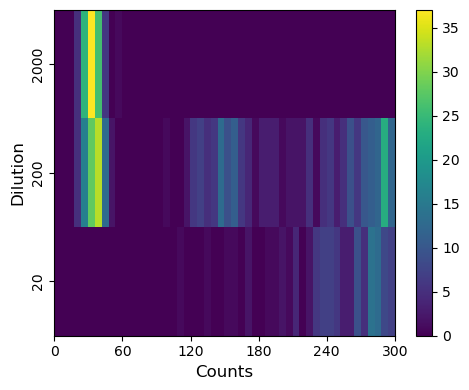

In [8]:
fig,ax = plt.subplots(1,figsize=(5,4))
data.dil_imshow(ax,fig)
plt.tight_layout()
plt.savefig('graphs/synth/fig3a.png',dpi=500)

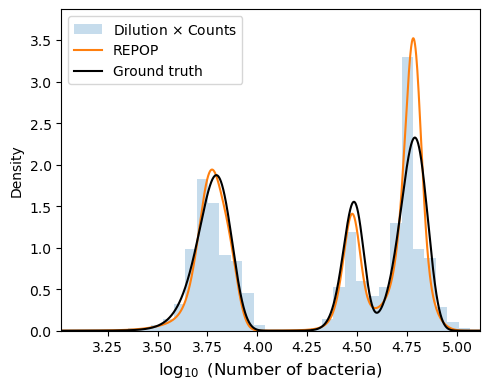

In [9]:
fig,ax = plt.subplots(1,figsize=(5,4))
data.log_plots(ax,th_gt)
plt.tight_layout()
plt.legend()
fig.savefig('graphs/synth/fig3b',dpi=500)

In [10]:
del data.lpkdil_n
#del data
print('Relative error', rel_error(data,case))

Relative error tensor(0.0613, dtype=torch.float64)


In [11]:
data_nocutoff = load_dataset(filename,Nmax=datapoints,cutoff=-1)
data_nocutoff.evaluate(tol=1e-5)

22
6.462355585054741 -2675.4956084027763 -552.5450957576802
6.222145668403372 -2666.929787777065 -443.24687637593433
6.095922085548297 -2670.9540219871105 -376.4626508101007
5.993777170905205 -2669.7402918045245 -326.7780543760162
5.893980216541576 -2666.9412191969313 -279.71314987723747
5.8504518052267125 -2666.071707985351 -258.9485879301154
5.817940374257555 -2665.0801999980695 -243.74488856109645
5.791962121869437 -2664.8229128033645 -231.04133828613237
5.770921180054806 -2664.7094108436204 -220.65728151600604
5.754077081744468 -2664.6328195977057 -212.33085006410636
5.7407307082583 -2664.598438620914 -205.70791502406945
5.730249074096904 -2664.5754053013634 -200.50297717354755
5.722068003869706 -2664.5449187744416 -196.45311530910448
5.715681204889754 -2664.498860504985 -193.31343565386663
5.710729649904548 -2664.4845319991955 -190.85883729521777
5.706955108657587 -2664.487235204685 -188.97384827359087
5.704058328094581 -2664.482997550768 -187.53355027062128
5.701846472664307 -266

(tensor([5.6655e+03, 4.9775e+03, 5.6777e+04, 7.8982e+03, 5.6580e+04, 5.6340e+04,
         5.3578e+04, 2.9511e+04, 5.1467e+04, 2.9506e+04, 4.9627e+04, 7.3845e+04,
         2.9603e+04, 2.9711e+04, 4.6743e+04, 3.0096e+04, 3.1129e+03, 4.3830e+04,
         3.0615e+04, 3.8576e+04, 3.1303e+04, 1.5097e+01], device='cuda:0',
        dtype=torch.float64),
 tensor([1.5514e+02, 4.8455e+02, 1.8912e+03, 4.2052e+02, 2.3177e+03, 2.7159e+03,
         5.3718e+03, 2.4653e+03, 7.8624e+03, 2.7566e+03, 1.0281e+04, 1.6455e+04,
         3.4008e+03, 3.7118e+03, 1.1056e+04, 4.5604e+03, 4.6013e+02, 1.0987e+04,
         5.9416e+03, 1.0133e+04, 7.1814e+03, 7.8367e+00], device='cuda:0',
        dtype=torch.float64),
 tensor([0.1654, 0.1302, 0.1051, 0.0827, 0.0806, 0.0698, 0.0546, 0.0469, 0.0405,
         0.0362, 0.0307, 0.0296, 0.0236, 0.0203, 0.0178, 0.0146, 0.0142, 0.0130,
         0.0082, 0.0078, 0.0064, 0.0017], device='cuda:0', dtype=torch.float64))

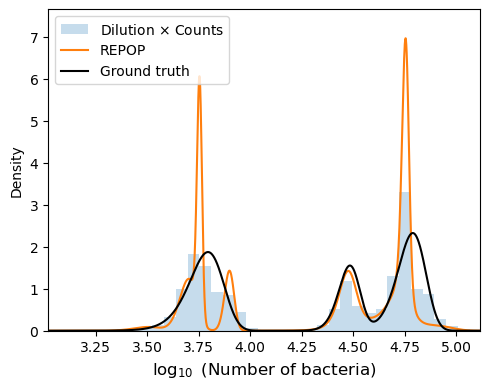

In [12]:
fig,ax = plt.subplots(1,figsize=(5,4))
data_nocutoff.log_plots(ax,th_gt)
plt.tight_layout()
plt.legend()
fig.savefig('graphs/synth/fig3c',dpi=500)

In [13]:
print('Relative error', rel_error(data_nocutoff,case))

Relative error tensor(0.1164, dtype=torch.float64)


/home/pessoa/Codes/CElegans-Plate/repop.py:324: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks() * bins[-1]).astype(int))


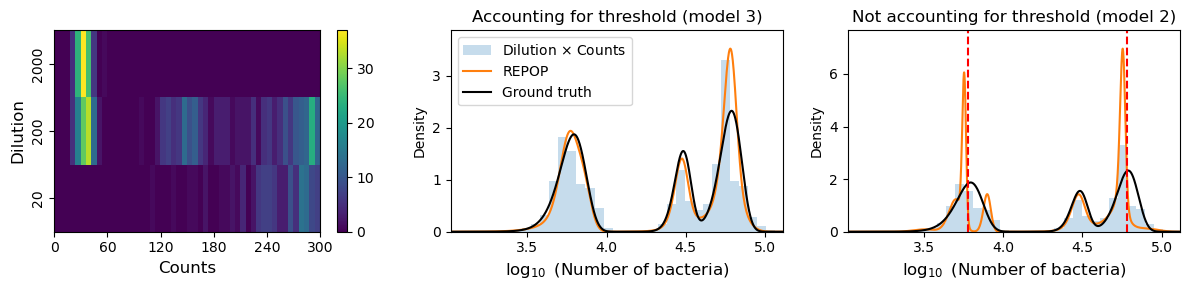

In [14]:
fig,ax = plt.subplots(1,3,figsize=(12,3))
data.dil_imshow(ax[0],fig)
data.log_plots(ax[1],th_gt)
data_nocutoff.log_plots(ax[2],th_gt)


ax[1].set_title('Accounting for threshold (model 3)',fontsize=12)
ax[1].legend()
ax[2].set_title('Not accounting for threshold (model 2)',fontsize=12)

#legend=False
for ct in np.log10(data.cutoff*torch.unique(data.dils).numpy()):
    ax[2].axvline(ct,color='red',linestyle='dashed')

plt.tight_layout()
fig.savefig('graphs/synth/'+case.name,dpi=900)